# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----
Define salaries based upon the job description.  

The HR department doesn't quiet understand how to set salaries for each job.  They would like to predict the job salary based upon the job description. The supplied data will be used to determine how to appropriate set (predict) the salary range for a given job description.

In [2]:
# import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
from IPython.display import HTML, IFrame
#etc


# your info here
__author__ = "Nicholas Arquette"
__email__ = "nicholas.arquette@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----



In [3]:
# load the data into a Pandas dataframe
train_features = pd.read_csv('data/train_features.csv', sep=',', low_memory=False)
train_salaries = pd.read_csv('data/train_salaries.csv', sep=',', low_memory=False)

In [4]:
# build a dictionary to store train jobids and salaries
salary_dict = dict(zip(train_salaries.jobId, train_salaries.salary))

In [5]:
# copy train feature data frame
train_data = train_features.copy()

# add new column to train data
train_data['salary'] = train_salaries['jobId'].apply(
    lambda job_id: salary_dict.get(job_id))

In [6]:
# delete train features and train salaries from memory
del train_features
del train_salaries

In [7]:
# show a few rows of data
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [8]:
# describe the train data set
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [9]:
# look at salaries at zero
train_data.loc[train_data['salary'] <= 0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [10]:
# show the first few rows
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [11]:
# show if there are any null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


In [12]:
# show the counts by job
train_data.jobType.value_counts()

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

In [13]:
# show the counts by Company ID
train_data.companyId.value_counts()

COMP39    16193
COMP35    16114
COMP59    16066
COMP30    16041
COMP3     16028
          ...  
COMP17    15715
COMP0     15666
COMP2     15641
COMP8     15638
COMP57    15635
Name: companyId, Length: 63, dtype: int64

In [14]:
# show the count of features by Degree
train_data.degree.value_counts()

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

In [15]:
# show the counts by major
train_data.major.value_counts()

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

In [16]:
# show the counts by industry
train_data.industry.value_counts()

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

### ---- 3 Clean the data ----

In [17]:
# drop salary data less than or equal to zero
train_data_clean = train_data.loc[train_data['salary'] >= 0]


In [18]:
# put the columns to be analyzed in a list
columns = ['companyId', 'jobType', 'degree', 'major', 
           'industry', 'yearsExperience', 'milesFromMetropolis']

# show duplicate values by the list of columns
# if the information is the same for all columns it will show as a duplicate
duplicate = train_data_clean[train_data_clean.duplicated(subset=columns, keep='last') == True]
duplicate


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
83,JOB1362684407770,COMP17,MANAGER,NONE,NONE,SERVICE,8,15,111
122,JOB1362684407809,COMP46,JANITOR,NONE,NONE,AUTO,1,21,55
216,JOB1362684407903,COMP36,JANITOR,NONE,NONE,OIL,16,87,72
294,JOB1362684407981,COMP37,CEO,DOCTORAL,CHEMISTRY,AUTO,11,60,135
302,JOB1362684407989,COMP1,JANITOR,NONE,NONE,HEALTH,8,38,73
...,...,...,...,...,...,...,...,...,...
978443,JOB1362685386130,COMP3,JANITOR,HIGH_SCHOOL,NONE,AUTO,18,14,78
982142,JOB1362685389829,COMP38,JANITOR,NONE,NONE,HEALTH,14,80,48
987233,JOB1362685394920,COMP26,CTO,NONE,NONE,WEB,6,77,91
990353,JOB1362685398040,COMP2,VICE_PRESIDENT,NONE,NONE,WEB,11,87,101


In [19]:
# show a few examples of duplicate data
train_data_clean.loc[(train_data_clean['companyId'] == 'COMP17') & (train_data_clean['degree'] == 'NONE') &
                   (train_data_clean['yearsExperience'] == 8) & (train_data_clean['milesFromMetropolis'] == 15) &
                   (train_data_clean['industry'] == 'SERVICE')]
                   

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
83,JOB1362684407770,COMP17,MANAGER,NONE,NONE,SERVICE,8,15,111
515491,JOB1362684923178,COMP17,MANAGER,NONE,NONE,SERVICE,8,15,80


In [20]:
# drop duplicates from the dataframe based on the column
# make sure to keep the first rwo
train_data_clean.drop_duplicates(subset=columns, keep='first', inplace=True)

In [21]:
# make sure that the data is gone
duplicate = train_data_clean[train_data_clean.duplicated(subset=columns, keep='last') == True]
duplicate

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [22]:
# get the average salary by industry
avg_salary = train_data.groupby('industry')['salary'].mean()

# store average salary information in a dictionary
avg_salary_dict = dict(zip(avg_salary.keys(), avg_salary.to_list()))

# add average slary to the train data
train_data['avg_salary'] = train_data['industry'].apply(lambda salary: avg_salary_dict.get(salary))

# show the new column
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,avg_salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,115.735540
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,121.644512
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,115.735540
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,109.433690
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,130.746743


### ---- 4 Explore the data (EDA) ----

In [23]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

produceProfile = 'N'

if produceProfile == 'Y':
    profile = ProfileReport(train_data_clean, title="Salary Prediction Profile", minimal=True)
    profile.to_file('salary_prediction_feature_overview.html')
    profile

In [24]:
IFrame(src='salary_prediction_feature_overview.html', width=950, height=400)

In [25]:
# re-order data frame to prepare for correlation matric
train_data_clean = train_data_clean[['salary',
 'companyId',
 'jobType',
 'degree',
 'major',
 'industry',
 'yearsExperience',
 'milesFromMetropolis',
]]

# verify re-ordering
train_data_clean.head()

,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [26]:
# show numeric correlation matric
correlation_matrix = train_data_clean.corr()
correlation_matrix

,salary,yearsExperience,milesFromMetropolis
salary,1.000000,0.375296,-0.297965
yearsExperience,0.375296,1.000000,0.000615
milesFromMetropolis,-0.297965,0.000615,1.000000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


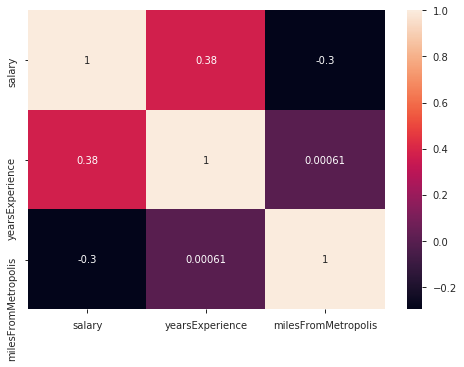

In [27]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


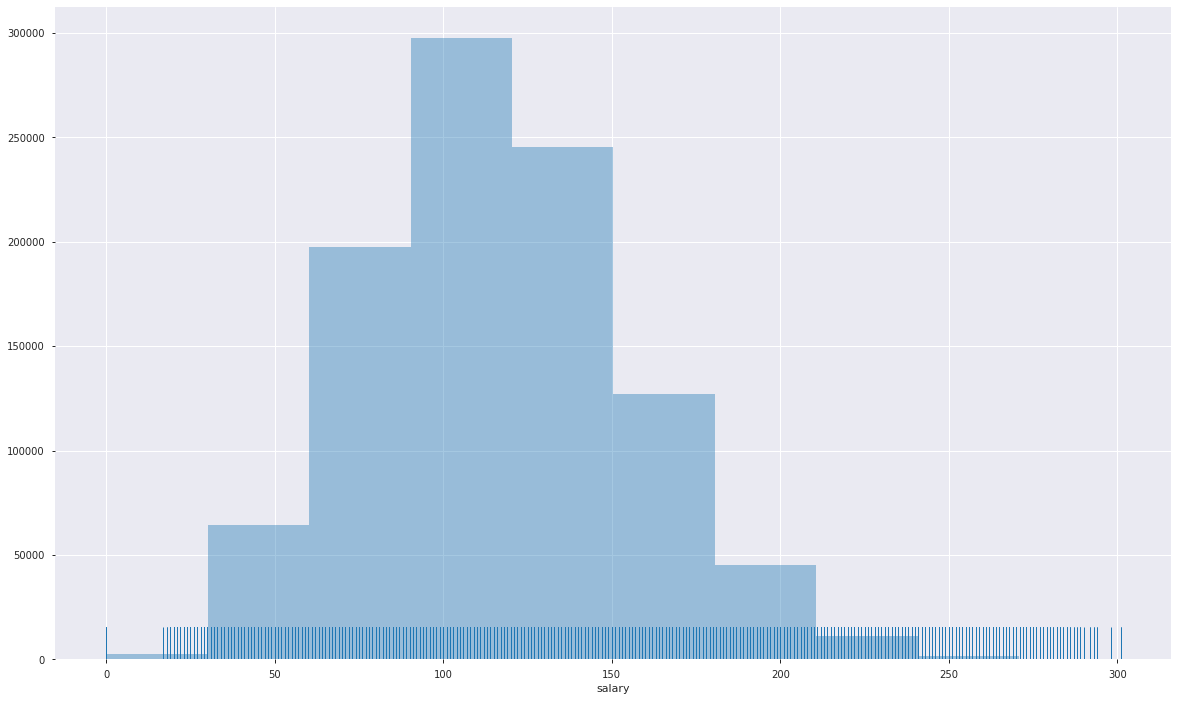

In [28]:
plt.figure(figsize=(20,12))
col = 'salary'
sns.distplot(train_data_clean[col], bins=10, kde=False, rug=True);

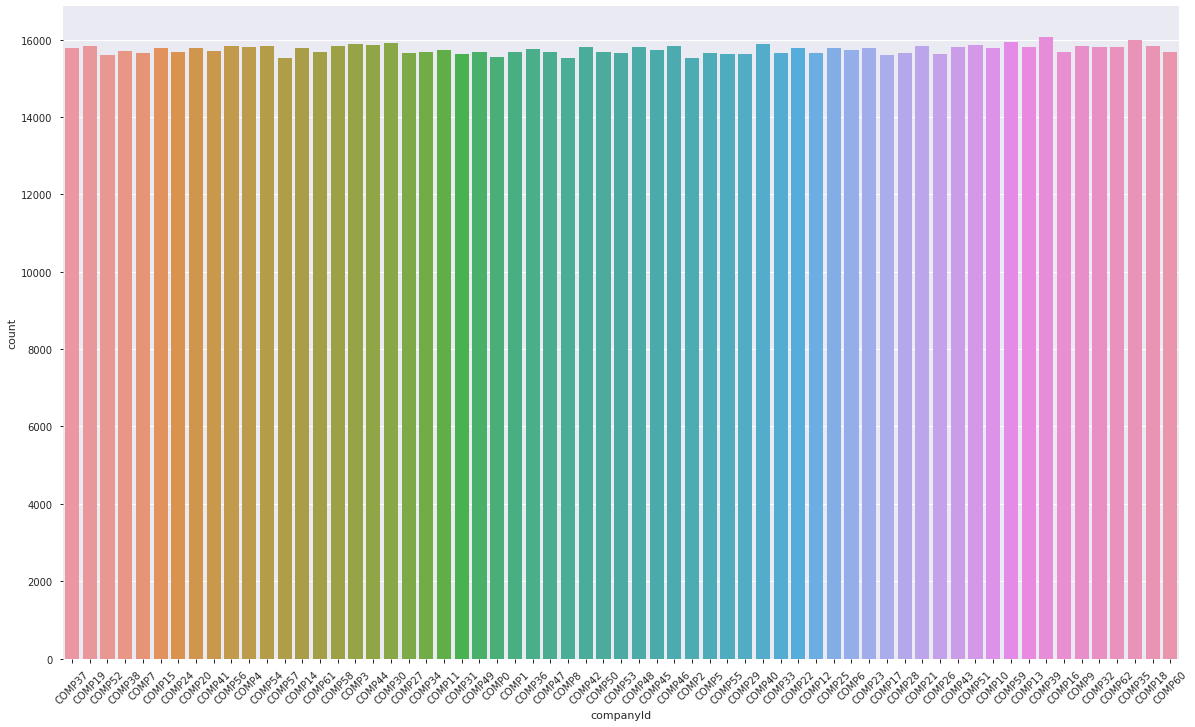

In [29]:
plt.figure(figsize=(20,12))
col = 'companyId'
chart = sns.countplot(train_data_clean[col])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

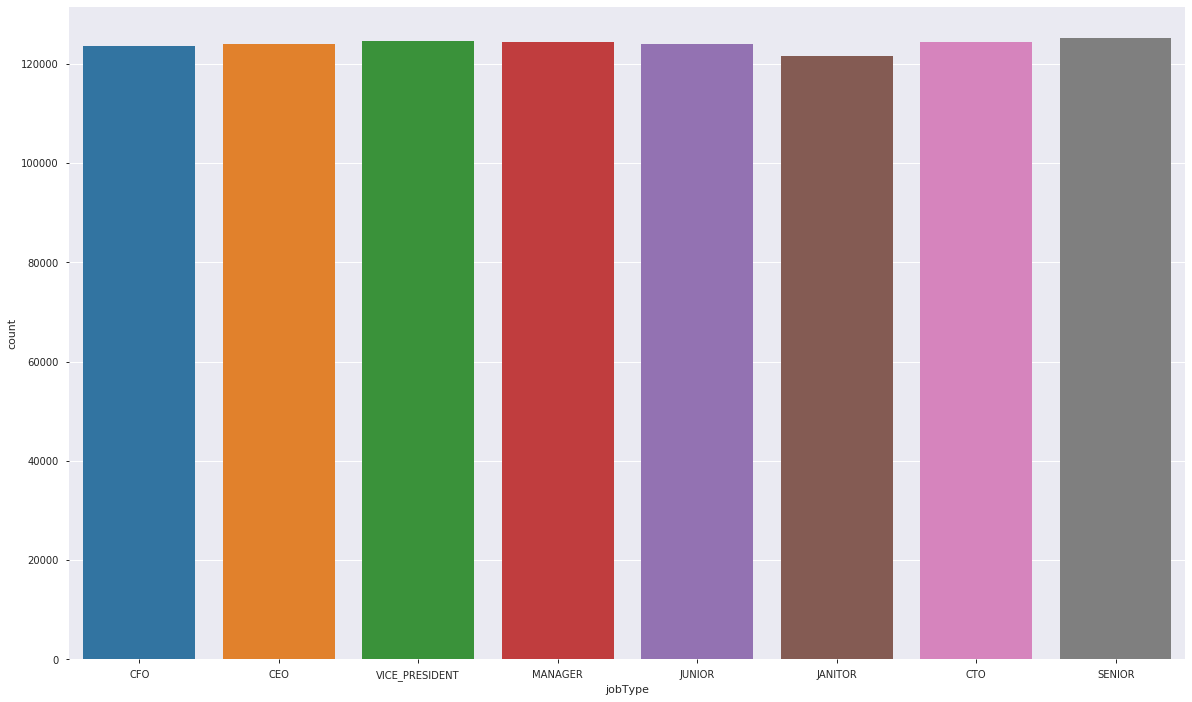

In [30]:
plt.figure(figsize=(20,12))
col = 'jobType'
sns.countplot(train_data_clean[col]);

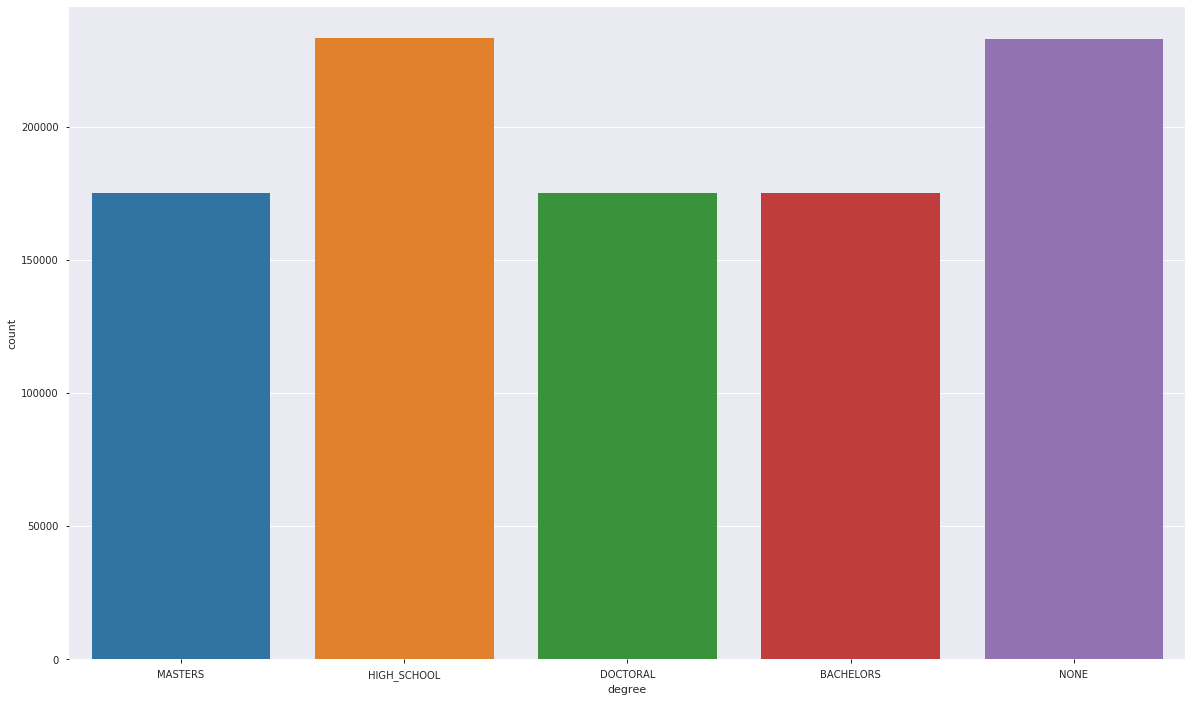

In [31]:
plt.figure(figsize=(20,12))
col = 'degree'
sns.countplot(train_data_clean[col]);

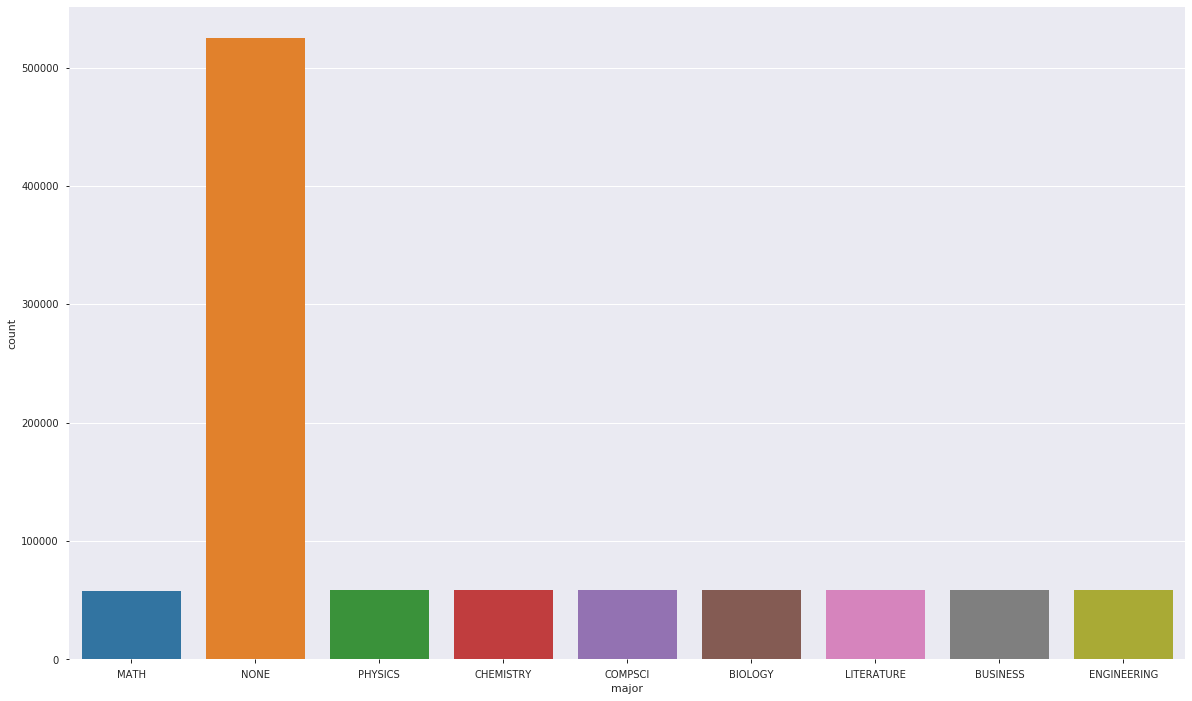

In [32]:
plt.figure(figsize=(20,12))
col = 'major'
sns.countplot(train_data_clean[col]);

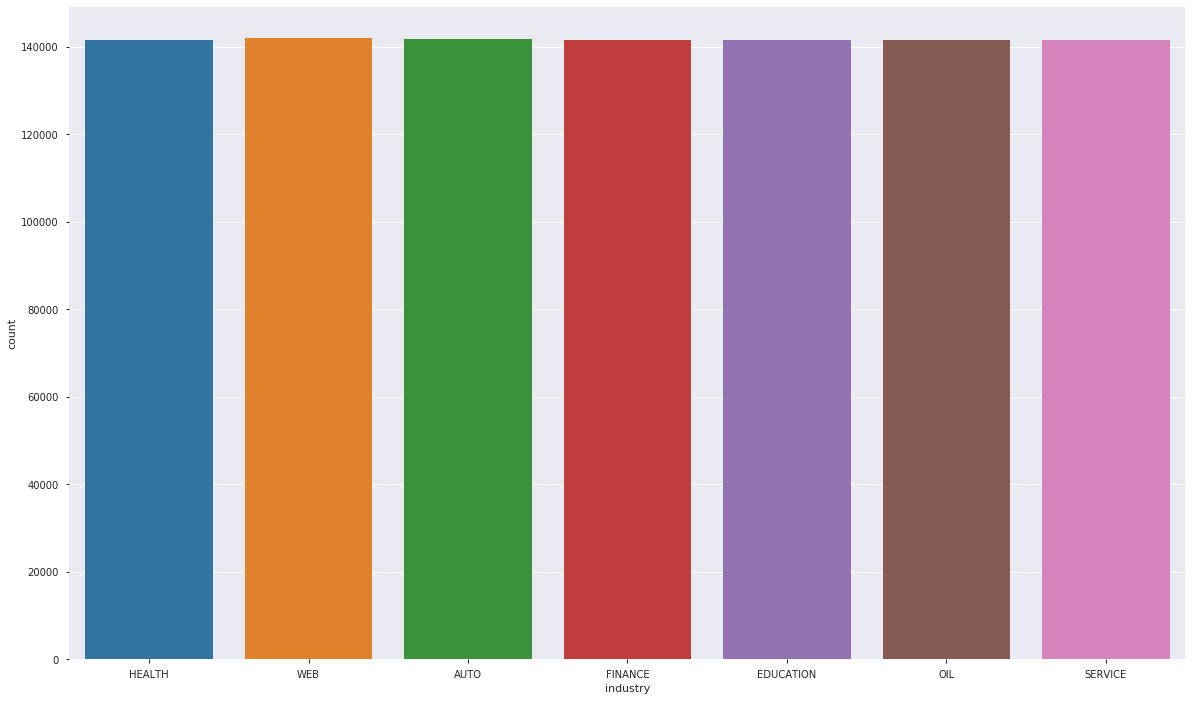

In [33]:
plt.figure(figsize=(20,12))
col = 'industry'
sns.countplot(train_data_clean[col]);

In [34]:
train_data_clean = pd.get_dummies(train_data_clean)
train_data_clean.columns.to_list()

['salary',
 'yearsExperience',
 'milesFromMetropolis',
 'companyId_COMP0',
 'companyId_COMP1',
 'companyId_COMP10',
 'companyId_COMP11',
 'companyId_COMP12',
 'companyId_COMP13',
 'companyId_COMP14',
 'companyId_COMP15',
 'companyId_COMP16',
 'companyId_COMP17',
 'companyId_COMP18',
 'companyId_COMP19',
 'companyId_COMP2',
 'companyId_COMP20',
 'companyId_COMP21',
 'companyId_COMP22',
 'companyId_COMP23',
 'companyId_COMP24',
 'companyId_COMP25',
 'companyId_COMP26',
 'companyId_COMP27',
 'companyId_COMP28',
 'companyId_COMP29',
 'companyId_COMP3',
 'companyId_COMP30',
 'companyId_COMP31',
 'companyId_COMP32',
 'companyId_COMP33',
 'companyId_COMP34',
 'companyId_COMP35',
 'companyId_COMP36',
 'companyId_COMP37',
 'companyId_COMP38',
 'companyId_COMP39',
 'companyId_COMP4',
 'companyId_COMP40',
 'companyId_COMP41',
 'companyId_COMP42',
 'companyId_COMP43',
 'companyId_COMP44',
 'companyId_COMP45',
 'companyId_COMP46',
 'companyId_COMP47',
 'companyId_COMP48',
 'companyId_COMP49',
 'com

In [35]:
train_data_clean.head()

,salary,yearsExperience,milesFromMetropolis,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,130,10,83,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,101,3,73,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,137,10,38,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,142,8,17,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,163,8,16,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


### ---- 5 Establish a baseline ----

In [36]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

# add average 
salary_features = train_data_clean.drop('salary', axis=1)
salary_pred = train_data_clean['salary']
print(salary_features.columns.to_list())
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

['yearsExperience', 'milesFromMetropolis', 'companyId_COMP0', 'companyId_COMP1', 'companyId_COMP10', 'companyId_COMP11', 'companyId_COMP12', 'companyId_COMP13', 'companyId_COMP14', 'companyId_COMP15', 'companyId_COMP16', 'companyId_COMP17', 'companyId_COMP18', 'companyId_COMP19', 'companyId_COMP2', 'companyId_COMP20', 'companyId_COMP21', 'companyId_COMP22', 'companyId_COMP23', 'companyId_COMP24', 'companyId_COMP25', 'companyId_COMP26', 'companyId_COMP27', 'companyId_COMP28', 'companyId_COMP29', 'companyId_COMP3', 'companyId_COMP30', 'companyId_COMP31', 'companyId_COMP32', 'companyId_COMP33', 'companyId_COMP34', 'companyId_COMP35', 'companyId_COMP36', 'companyId_COMP37', 'companyId_COMP38', 'companyId_COMP39', 'companyId_COMP4', 'companyId_COMP40', 'companyId_COMP41', 'companyId_COMP42', 'companyId_COMP43', 'companyId_COMP44', 'companyId_COMP45', 'companyId_COMP46', 'companyId_COMP47', 'companyId_COMP48', 'companyId_COMP49', 'companyId_COMP5', 'companyId_COMP50', 'companyId_COMP51', 'co

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data